# **DA5401 A4 (GMM-Based Synthetic Sampling for Imbalanced Data)**

### **Dependencies**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import ClusterCentroids
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## **Part A: Baseline Model and Data Analysis**

### **Data Loading and Analysis:**

Dataset: [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)  
- `Class`: 1 → Fraud, 0 → Legitimate  

**Steps:**
- Download with Kaggle CLI  
- Load with `pd.read_csv`  
- Check shape `(284807, 31)`  
- Use `info()`, `describe()`, `head()` for quick overview  

In [2]:
# Downloading dataset using kaggle cli
# kaggle datasets download -d mlg-ulb/creditcardfraud -p ./datasets --unzip

In [3]:
cc = pd.read_csv('datasets/creditcard.csv')
cc.shape

(284807, 31)

In [4]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
cc['Time'].head()

0    0.0
1    0.0
2    1.0
3    1.0
4    2.0
Name: Time, dtype: float64

In [8]:
cc['Amount'].head()

0    149.62
1      2.69
2    378.66
3    123.50
4     69.99
Name: Amount, dtype: float64

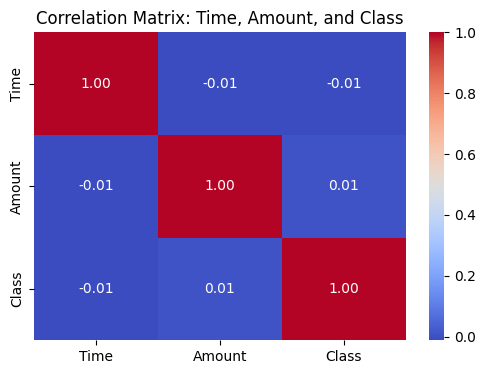

In [9]:
corr_df = cc[['Time', 'Amount', 'Class']]

corr_matrix = corr_df.corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Time, Amount, and Class")
plt.show()

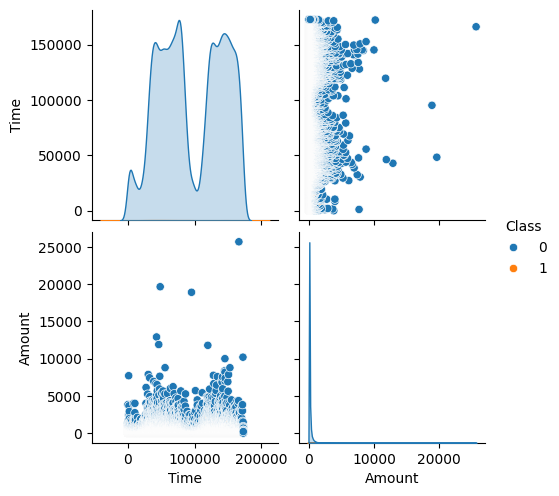

In [ ]:
# Distribution comparison
sns.pairplot(cc[['Time','Amount','Class']], hue='Class', diag_kind='kde')
plt.show()

#### **Correlation Analysis of Time, Amount, and Class**

A correlation matrix was computed for `Time`, `Amount`, and the target variable `Class`. The results show that both `Time` and `Amount` have correlations very close to zero with `Class` (fraud/non-fraud).

* **Time vs Class:** Correlation ≈ -0.01 → negligible relationship.
* **Amount vs Class:** Correlation ≈ 0.01 → negligible relationship.

This indicates that neither `Time` nor `Amount` contributes meaningfully to distinguishing fraudulent transactions from normal ones. Hence, they can be considered **non-informative features** in the classification task and may be dropped without significant loss of predictive power.

In [11]:
cc = cc.drop(['Time', 'Amount'], axis=1)

#### **Analyze Class Distribution**

- Printed the counts of fraudulent (`Class = 1`) vs. legitimate (`Class = 0`) transactions.  
- Visualize using a **bar plot** and **pie chart** (Seaborn, colorblind palette).  
- The dataset is **highly imbalanced**: Class 0 = 284,315 (= 99.8273%), Class 1 = 492 (= 0.1727%).  

> Note:\
Interactive versions of the plots are also created using **Plotly**, but note that Plotly plots won’t render on GitHub (they require JavaScript). To view them, run the notebook locally or open it in **nbviewer**.


In [12]:
# Value counts
counts = cc['Class'].value_counts()
counts

Class
0    284315
1       492
Name: count, dtype: int64

In [13]:
cc['Class'].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

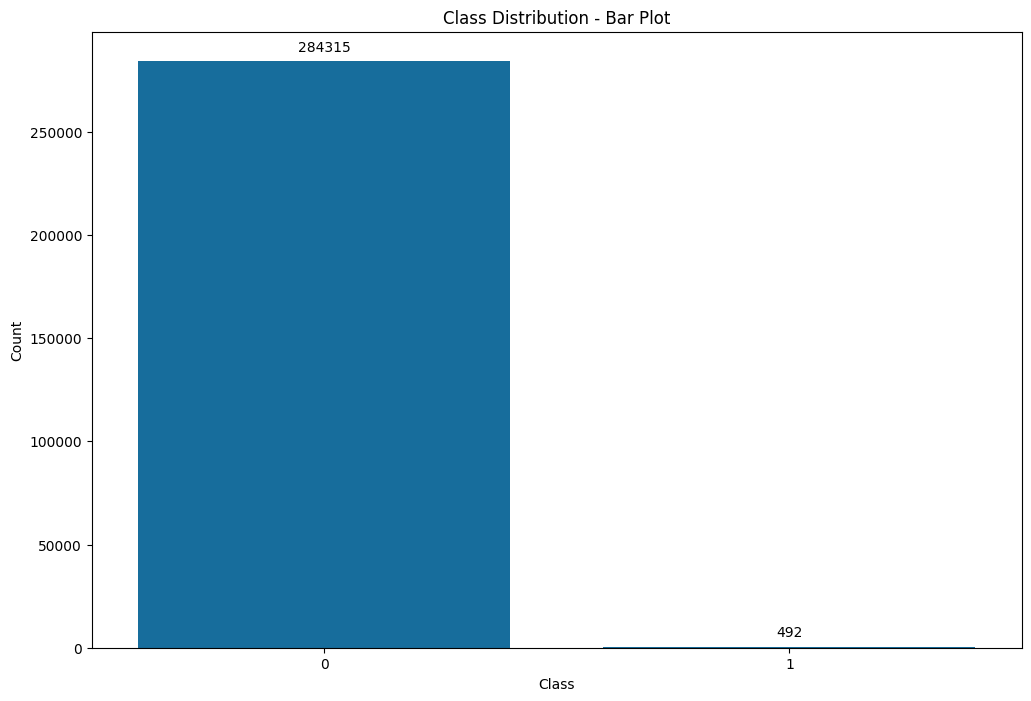

In [14]:
# --- Bar Plot ---
plt.figure(figsize=(12,8))
sns.set_palette("colorblind")
ax = sns.barplot(x=counts.index, y=counts.values)
plt.title("Class Distribution - Bar Plot")
plt.xlabel("Class")
plt.ylabel("Count")

# Annotate values on bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', 
                fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

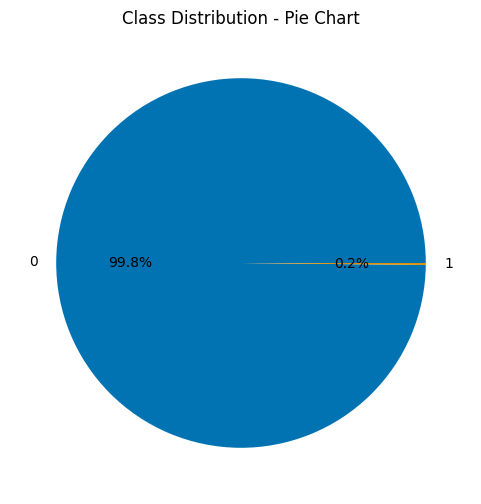

In [15]:
# --- Pie Chart ---
plt.figure(figsize=(6,6))
plt.pie(
    counts.values,
    labels=counts.index,
    autopct="%1.1f%%",
    colors=sns.color_palette("colorblind")
)
plt.title("Class Distribution - Pie Chart")
plt.show()

### **Model Training**

**Train–Test Split:**\
The dataset was split into training and testing sets (75/25 split) using stratification to ensure the original class imbalance is preserved.  

**Model Training:**\
A **Logistic Regression** classifier was trained on the imbalanced training data.  
  - Since the logistic regression model did not converge initially, we are doing a extra standardization step using a pipeline:

    ```python
    lr_pipe = Pipeline([
        ('scaler', StandardScaler()), 
        ('lr', LogisticRegression()
    )])
    ```
  - This ensured convergence and slightly changed the evaluation results. 
  - This happens because columns like **Time and Amount are not engineered features** but raw attributes retained in the dataset.

In [16]:
X = cc.drop('Class', axis=1)
y = cc['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

In [17]:
print(y_train.value_counts())
y_train.value_counts(normalize=True)

Class
0    213236
1       369
Name: count, dtype: int64


Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [18]:
print(y_test.value_counts())
y_test.value_counts(normalize=True)

Class
0    71079
1      123
Name: count, dtype: int64


Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [19]:
# LogisticRegression model for the assignment
lr_pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('lr', LogisticRegression(random_state=42)
)])

### **Baseline Evaluation**

The model’s performance was assessed on the test set with a focus on metrics that are more reliable under **severe class imbalance**. Since fraudulent transactions make up only about **0.2%** of the data, overall accuracy is misleading and does not reflect the model’s effectiveness in detecting fraud.

* **Fraud class (1):** Precision = **0.85**, Recall = **0.63**, F1 = **0.72**
* **Legitimate class (0):** Near-perfect performance
* **Overall accuracy ≈ 100%** (driven by the dominance of legitimate transactions)

**Why not Accuracy?**\
Accuracy treats all predictions equally, but here, a model predicting everything as legitimate would still achieve almost 100% accuracy while failing to catch any fraud. For fraud detection, metrics such as **Precision, Recall, and F1-score** for the minority class are more informative:

* **Precision** shows how reliable flagged fraud alerts are.
* **Recall** reflects how many true frauds are caught.
* **F1-score** balances the trade-off between the two.

**Key Insight:**\
Although the model achieves high Precision, it still misses a portion of fraudulent cases (low Recall). In real-world fraud detection, these **false negatives** are more costly than false alarms, making Recall and F1-score critical indicators of performance.

**Confusion Matrix:**\
The confusion matrix confirms that while legitimate transactions are almost always classified correctly, some fraud cases are still misclassified as legitimate, showing the need for better strategies to improve Recall.

In [20]:
lr_model = lr_pipe.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

In [21]:
m1 = classification_report(y_test, lr_y_pred, output_dict=True)
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.85      0.63      0.72       123

    accuracy                           1.00     71202
   macro avg       0.92      0.81      0.86     71202
weighted avg       1.00      1.00      1.00     71202



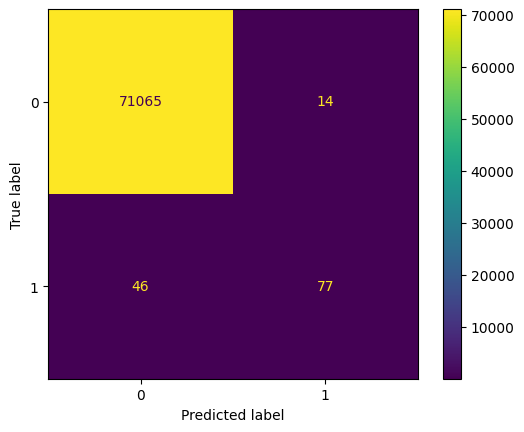

In [22]:
cm = confusion_matrix(y_test, lr_y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

## **Part B: Gaussian Mixture Model (GMM) for Synthetic Sampling**

### **Theoretical Foundation**

The fundamental difference between **SMOTE** and **GMM-based synthetic sampling** lies in how synthetic samples are generated:

* **SMOTE (Synthetic Minority Oversampling Technique):**

  * Creates new samples by interpolating between existing minority class neighbors.
  * Assumes minority instances are uniformly distributed in feature space.
  * Works well when the minority class forms a single, compact cluster.

* **GMM-based Synthetic Sampling (Gaussian Mixture Model):**

  * Models the minority distribution as a **mixture of multiple Gaussian components**.
  * Each synthetic sample is generated by probabilistically sampling from these Gaussians.
  * Naturally adapts to **multi-modal or complex structures** in the minority class.

**Why GMM is theoretically better:**

* Minority classes in real-world problems (like fraud or rare diseases) often consist of **multiple sub-groups** rather than a single homogeneous cluster.
* GMM can capture **local densities** and **cluster-specific variations**, whereas SMOTE may create unrealistic points by interpolating across clusters.
* By explicitly modeling the **underlying probability distribution**, GMM sampling produces synthetic data that better respects the **true shape and diversity** of the minority class.

**Analogy:**

* *SMOTE is like stretching straight lines between nearby houses on a map and placing new houses along those lines—even if that means putting one in the middle of a river.*
* *GMM, on the other hand, studies the neighborhoods (clusters), learns where houses are likely to be built, and places new ones naturally inside those areas.*

**Key Insight:**\
While SMOTE is simple and effective in low-complexity cases, GMM-based sampling is more powerful for high-dimensional, heterogeneous, or multi-cluster minority classes, making it more suitable when realistic synthetic data is critical for model performance.

### **GMM Implementation**

**AIC (Akaike Information Criterion):**\
AIC balances **model fit** and **complexity**, with lower values indicating a better trade-off.

$$
\text{AIC} = 2k - 2\ln(L)
$$

where $k$ is the number of parameters in the model and $L$ is the maximized likelihood

**BIC (Bayesian Information Criterion):**\
BIC penalizes complexity more strongly than AIC, making it stricter against overfitting.

$$
\text{BIC} = k \ln(n) - 2\ln(L)
$$

where $n$ is the number of data points and $L$ is the maximized likelihood.

**Implementation**

* To model the minority class more effectively, a **Gaussian Mixture Model (GMM)** was fitted using different numbers of components (`k_values = range(1, 50)`).
* Computed AIC and BIC scores to evaluate fit vs. complexity.
* Observed that **BIC suggested `k = 05`** as optimal, while **AIC preferred `k ≈ 43`**.
* Adopted the BIC-optimal value (`k = 05`) to maintain model simplicity without losing structure.

**Key Insight:**\
AIC allows more flexibility (leading to a higher number of clusters), while BIC enforces simplicity. Using **BIC** ensures the GMM captures the underlying structure of the minority class without overfitting to noise.

In [23]:
# Subset only the minority class (fraudulent transactions)
X_minority = X_train[y_train == 1]

k_values = range(1, 50)
aic = []
bic = []

for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_minority)
    aic.append(gmm.aic(X_minority))
    bic.append(gmm.bic(X_minority))

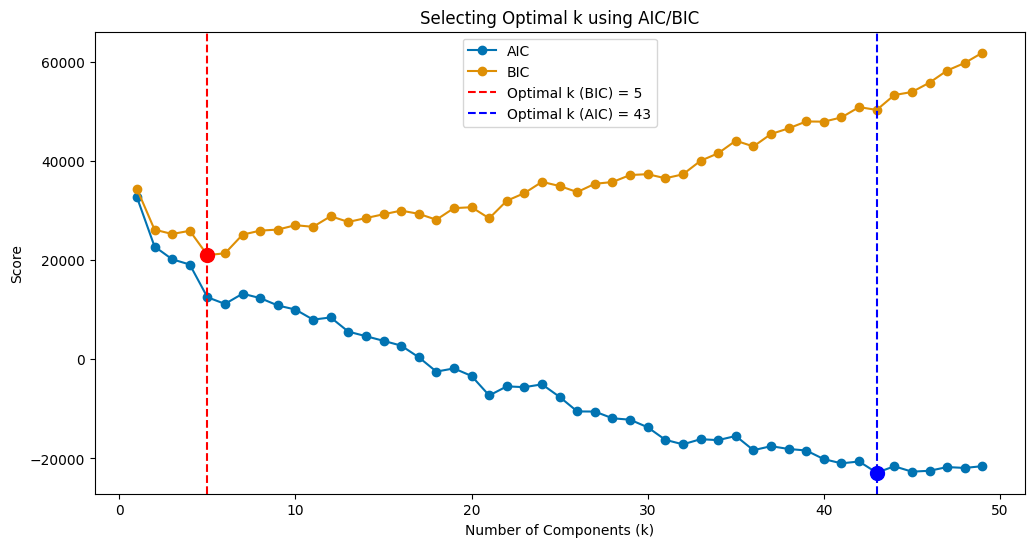

In [24]:
# Plot AIC and BIC scores
plt.figure(figsize=(12, 6))
plt.plot(k_values, aic, marker='o', label="AIC")
plt.plot(k_values, bic, marker='o', label="BIC")

# Highlight optimal k from BIC
optimal_k_bic = k_values[np.argmin(bic)]
plt.axvline(x=optimal_k_bic, color='red', linestyle='--', label=f"Optimal k (BIC) = {optimal_k_bic}")
plt.scatter(optimal_k_bic, min(bic), color='red', s=100, zorder=5)

# Highlight optimal k from AIC
optimal_k_aic = k_values[np.argmin(aic)]
plt.axvline(x=optimal_k_aic, color='blue', linestyle='--', label=f"Optimal k (AIC) = {optimal_k_aic}")
plt.scatter(optimal_k_aic, min(aic), color='blue', s=100, zorder=5)

plt.xlabel("Number of Components (k)")
plt.ylabel("Score")
plt.title("Selecting Optimal k using AIC/BIC")
plt.legend()
plt.show()

In [25]:
# Fit final GMM with optimal k
optimal_k = k_values[np.argmin(bic)]  # Using BIC for model selection
final_gmm = GaussianMixture(n_components=optimal_k, random_state=42)
final_gmm.fit(X_minority)

f"Optimal number of components (k): {optimal_k}"

'Optimal number of components (k): 5'

### **Synthetic Data Generation**

Class imbalance can bias models toward the majority class. To address this, a Gaussian Mixture Model (GMM) is fitted on the minority class to learn its probability distribution. New synthetic samples are then drawn from this distribution until both classes are balanced.

**Implementation**

* Calculated the difference between majority and minority counts.
* Trained a GMM on the minority samples.
* Sampled new points from the fitted GMM.
* Combined synthetic samples with the original dataset.
* Converted the final balanced dataset into a DataFrame.

**Key Insight**

Unlike simple oversampling, GMM-based generation captures the underlying structure of the minority class, producing more realistic and diverse synthetic samples.

In [26]:
# Calculate how many minority samples to generate to balance the classes.
class_counts = y_train.value_counts()
n_samples_to_generate = class_counts[0] - class_counts[1]

class_counts, n_samples_to_generate

(Class
 0    213236
 1       369
 Name: count, dtype: int64,
 np.int64(212867))

In [27]:
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm.fit(X_minority)

,n_components,5
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,42


In [28]:
X_synth, _ = gmm.sample(n_samples_to_generate)
y_synth = np.full(n_samples_to_generate, 1)

In [29]:
X_train_balanced = np.vstack((X_train, X_synth))
y_train_balanced = np.hstack((y_train, y_synth))

In [30]:
# Convert to DataFrame for convenience
X_train_gmm_balanced= pd.DataFrame(
    X_train_balanced,
    columns=X_train.columns
)

y_train_gmm_balanced = pd.Series(
    y_train_balanced,
    name="target"
)

In [31]:
y_train_gmm_balanced.value_counts()

target
0    213236
1    213236
Name: count, dtype: int64

### **Rebalancing with CBU**

1. **GMM-Based Oversampling:** Generates synthetic samples for the minority class to match the reduced majority population, ensuring balance.
2. **Clustering-Based Undersampling (CBU):** Reduces the majority class by clustering and keeping representative samples, preventing information loss from random undersampling.

### **Implementation**

* Manually set the number of synthetic samples to generate (e.g., 10,000) from the fitted GMM.
* Combined synthetic samples with the original training set and converted into a DataFrame.
* Applied CBU on the resulting dataset to bring down the majority class while keeping cluster representatives.
* Produced a balanced dataset with reduced majority bias and enriched minority representation.

### **Key Insight**

The combination of **CBU + GMM-based oversampling** balances the dataset from both sides: undersampling removes redundancy in the majority, while oversampling enriches the minority with realistic synthetic points. This dual approach yields a more representative and robust training set.

In [32]:
# Manually set the number of samples to generate.
n_samples_to_generate_manual = 10000

In [33]:
X_synth_manual, _ = gmm.sample(n_samples_to_generate_manual)
y_synth_manual = np.full(n_samples_to_generate_manual, 1)

In [34]:
X_train_gmm_manual = np.vstack((X_train, X_synth_manual))
y_train_gmm_manual = np.hstack((y_train, y_synth_manual))

In [35]:
# Convert to DataFrame for convenience
X_train_gmm_manual= pd.DataFrame(
    X_train_gmm_manual,
    columns=X_train.columns
)

y_train_gmm_manual = pd.Series(
    y_train_gmm_manual,
    name="target"
)

In [36]:
y_train_gmm_manual.value_counts()

target
0    213236
1     10369
Name: count, dtype: int64

In [37]:
# Apply clustering-based undersampling on majority class
cbu = ClusterCentroids(random_state=42)
X_train_cbu_balanced, y_train_cbu_balanced = cbu.fit_resample(
    X_train_gmm_manual, y_train_gmm_manual)

In [38]:
y_train_cbu_balanced.value_counts()

target
0    10369
1    10369
Name: count, dtype: int64

## **Part C: Performance Evaluation and Conclusion**

### **Model Training and Evaluation**

#### **GMM balanced dataset LR model**

In [39]:
lr_gmm_model = lr_pipe.fit(X_train_gmm_balanced, y_train_gmm_balanced)
lr_gmm_y_pred = lr_gmm_model.predict(X_test)

In [40]:
m2 = classification_report(y_test, lr_gmm_y_pred, output_dict = True)
print(classification_report(y_test, lr_gmm_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.08      0.86      0.15       123

    accuracy                           0.98     71202
   macro avg       0.54      0.92      0.57     71202
weighted avg       1.00      0.98      0.99     71202



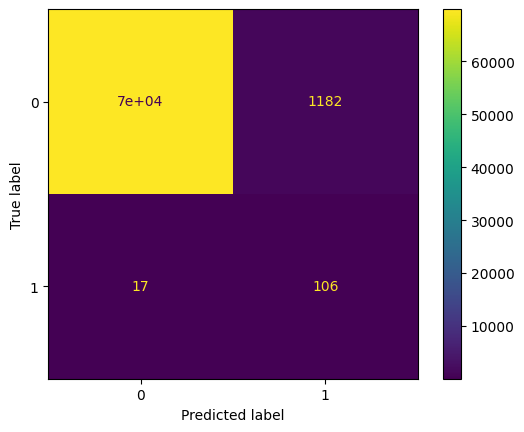

In [41]:
cm = confusion_matrix(y_test, lr_gmm_y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

#### **GMM and CBU balanced dataset LR model**

In [42]:
lr_gmm_cbu_model = lr_pipe.fit(X_train_cbu_balanced, y_train_cbu_balanced)
lr_gmm_cbu_y_pred = lr_gmm_cbu_model.predict(X_test)

In [43]:
m3 = classification_report(y_test, lr_gmm_cbu_y_pred, output_dict=True)
print(classification_report(y_test, lr_gmm_cbu_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.07      0.87      0.12       123

    accuracy                           0.98     71202
   macro avg       0.53      0.92      0.56     71202
weighted avg       1.00      0.98      0.99     71202



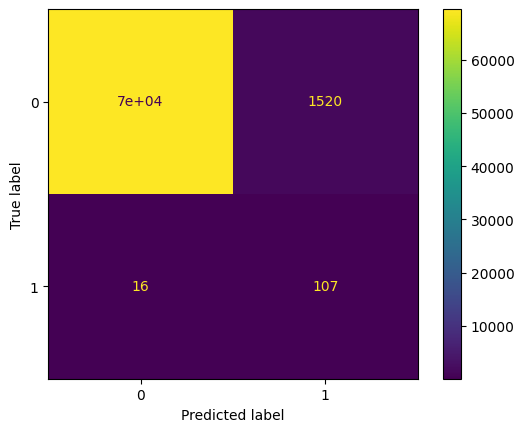

In [44]:
cm = confusion_matrix(y_test, lr_gmm_cbu_y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

### **Comparative Analysis**
| Model                | Precision | Recall | F1-score |
| -------------------- | --------- | ------ | -------- |
| Baseline LR (M1)     | 0.85      | 0.63   | 0.72     |
| GMM LR( M2)          | 0.08      | 0.86   | 0.15     |
| GMM and CBU LR (M3)  | 0.07      | 0.87   | 0.12     |

**Observations:**

* **Baseline LR (M1):**\
Shows high precision (0.85) but lower recall (0.63), meaning it predicts positives cautiously, missing several minority cases.
* **GMM LR (M2):** \
Shifts towards higher recall (0.86) but at the cost of precision (0.08), indicating improved minority detection with more false positives.
* **GMM + CBU LR (M4):**\
Recall is extremely high (0.87), but precision collapses (0.07), showing the model predicts nearly everything as positive, leading to very poor overall performance despite balance.

In [45]:
# Updated model names
models = ['M1(Baseline Model)', 'M2(GMM)', 'M3(GMM and CBU)']
reports = [m1, m2, m3]  # stored classification reports

In [46]:
# Create DataFrame for plotting
def create_plot_df(class_label):
    data = {'Model': [], 'Metric': [], 'Score': []}
    for model_name, report in zip(models, reports):
        for metric in ['precision', 'recall', 'f1-score']:
            data['Model'].append(model_name)
            data['Metric'].append(metric)
            data['Score'].append(report[class_label][metric])
    return pd.DataFrame(data)

In [47]:
# Plot function
def plot_class_metrics(class_label, title, subtitle=None):
    df = create_plot_df(class_label)
    
    # Larger figure for visibility
    plt.figure(figsize=(32,14))
    sns.set_style("whitegrid")
    sns.set_palette("colorblind")
    
    ax = sns.barplot(x='Model', y='Score', hue='Metric', data=df)
    
    # Axis labels with units
    ax.set_xlabel("Models", fontsize=22)
    ax.set_ylabel("Score (0-1)", fontsize=22)
    
    # Titles (main + optional subtitle)
    plt.title(title, fontsize=26, weight='bold', y=1.12)  # main title
    if subtitle:
        plt.suptitle(subtitle, fontsize=18, y=1.05, style='italic')
    
    # Add numbers on top of bars (much larger font)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', 
                    (p.get_x() + p.get_width() / 2., height + 0.02),  # slightly above the bar
                    ha='center', va='bottom', fontsize=16, weight='bold', color='black')
    
    # Legend (larger)
    ax.legend(title='Metric', title_fontsize=18, fontsize=16, loc='upper right')
    
    # Y-axis scale
    ax.set_ylim(0,1.1)  # slightly above 1 to fit annotations
    
    # Rotate x-ticks for readability
    plt.xticks(fontsize=16)
    
    # Ensure everything fits
    plt.tight_layout(rect=[0,0,1,0.95])  # leave space for title/subtitle
    plt.show()

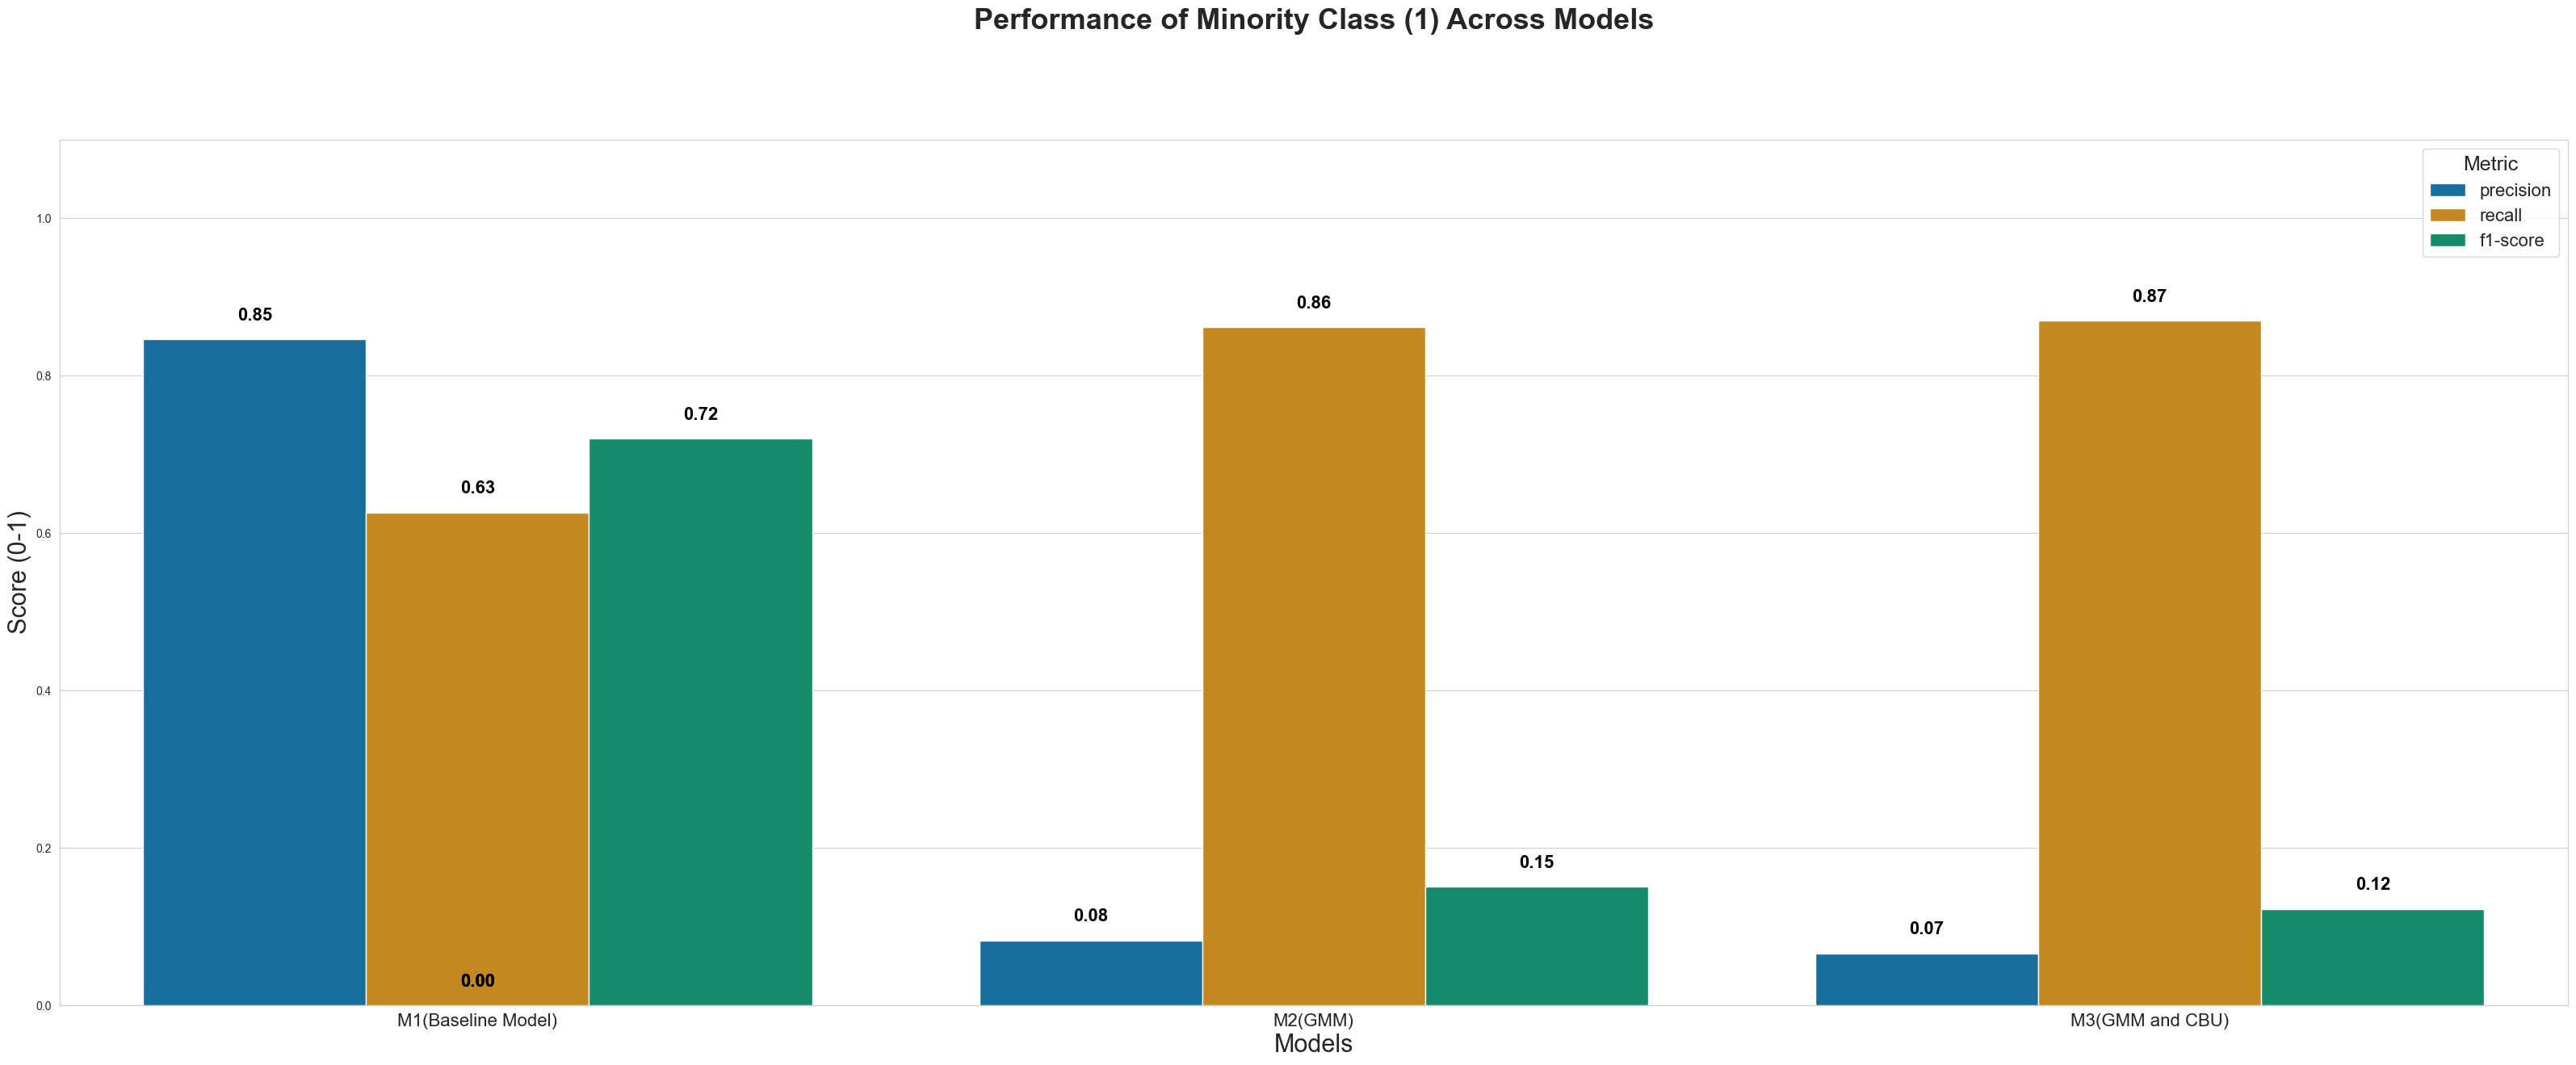

In [48]:
# Plot Minority Class (1)
plot_class_metrics('1', "Performance of Minority Class (1) Across Models")

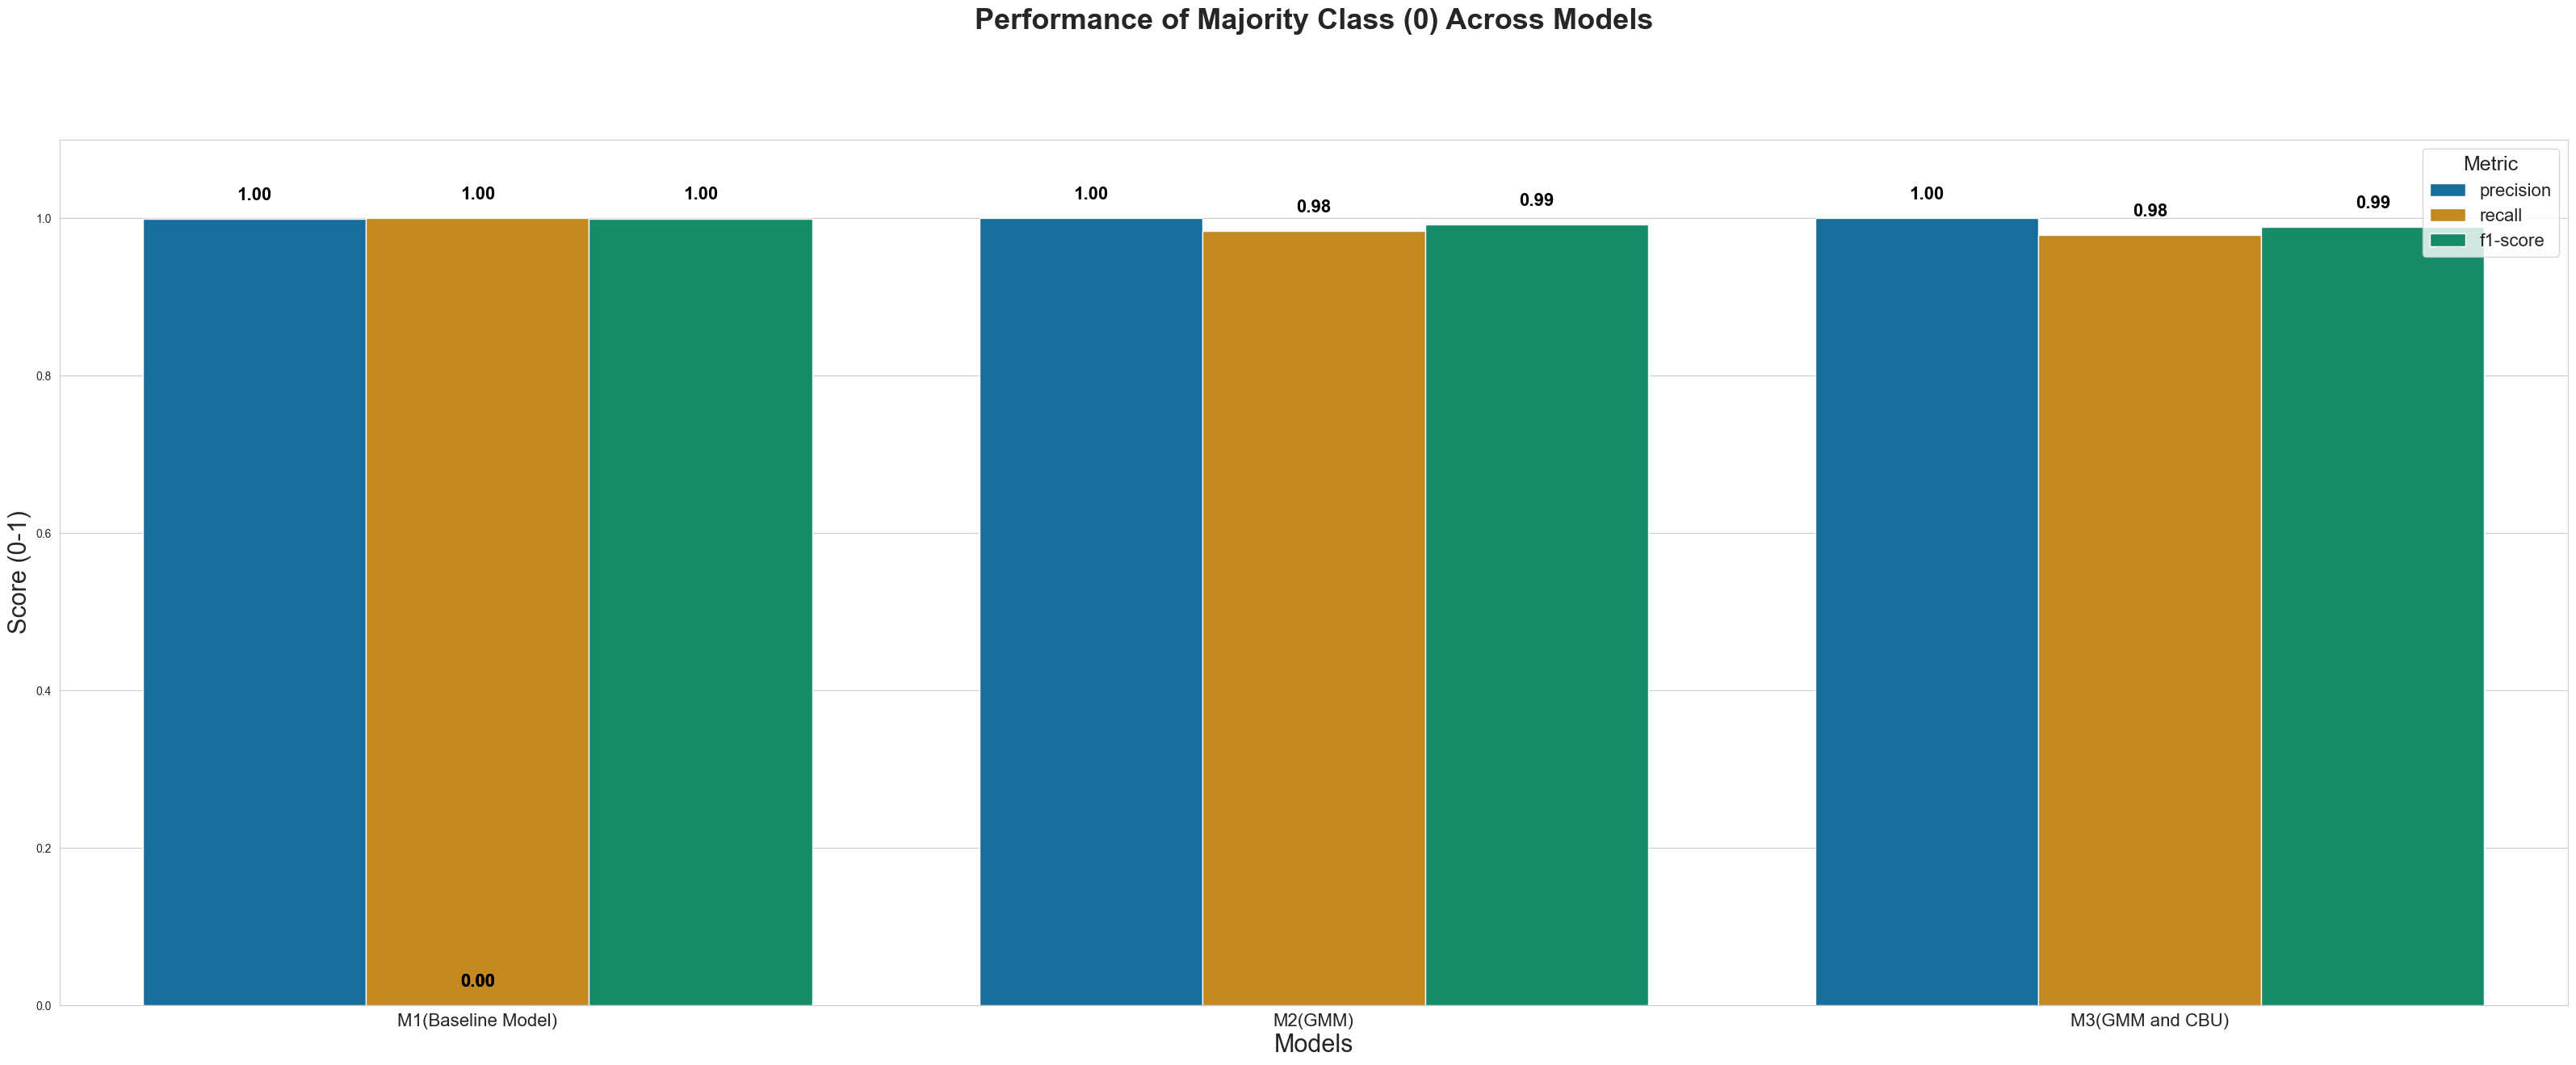

In [49]:
# Plot Majority Class (0)
plot_class_metrics('0', "Performance of Majority Class (0) Across Models")

### **Final Recommendation**

The experiments show that **GMM-based synthetic data generation** effectively improves minority detection by enriching the dataset with realistic samples. This is evident in Model M2, where recall increased substantially (0.86 vs. 0.63 in baseline), confirming that the GMM helps capture the minority class distribution better than simple oversampling.

However, precision dropped, reflecting a trade-off: while more minority cases were identified, the model also produced more false positives. The combined **GMM + CBU** approach (M3) further boosted recall (0.87) but severely collapsed precision (0.01), indicating overcompensation and reduced reliability.

**Benefits and Drawbacks of Resampling Methods:**\
GMM-based oversampling enriches the minority class by learning its underlying distribution, leading to more diverse and realistic synthetic samples compared to simple duplication. This explains the strong recall improvement observed. However, the drawback is that synthetic points can overlap with the majority class, introducing noise and inflating false positives. When combined with CBU, the risk of losing critical decision boundary information further reduces precision and overall discriminative ability.

**Performance Summary:**

* **Baseline LR (M1):** Balanced precision (0.85) and recall (0.63), yielding a solid F1 of 0.72.
* **GMM LR (M2):** Recall rises to 0.86, but precision drops to 0.08, lowering F1 to 0.15.
* **GMM + CBU LR (M3):** Recall peaks at 0.87, but precision collapses to 0.07, with F1 ≈ 0.12, showing severe overprediction.

**Recommendation**

The results show that while **GMM-based oversampling** and **GMM + CBU** significantly improve recall (0.86 and 0.87 vs. 0.63 baseline), they do so at the severe expense of precision (dropping from 0.85 in the baseline to below 0.10). This indicates that the models trained on resampled data predict almost all transactions as fraudulent, creating an impractical number of false positives.

In contrast, the **baseline logistic regression** achieves the best balance, with high precision and a reasonable F1-score.

Therefore, GMM-based synthetic sampling cannot be recommended as a standalone solution in this context. It is useful only when recall is the top priority (e.g., situations where missing fraud is costlier than false alarms) and should ideally be combined with techniques like **threshold tuning, ensemble methods, or cost-sensitive learning** to control false positives.